In [43]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [44]:
data = pd.read_csv("wine-clustering.csv")  
data  

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
import warnings 
warnings.filterwarnings("ignore") 

sns.set(style="whitegrid")

In [46]:
X = data.copy()

X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [47]:
X.dtypes.value_counts()

float64    11
int64       2
Name: count, dtype: int64

In [48]:
X.isna().sum()  

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

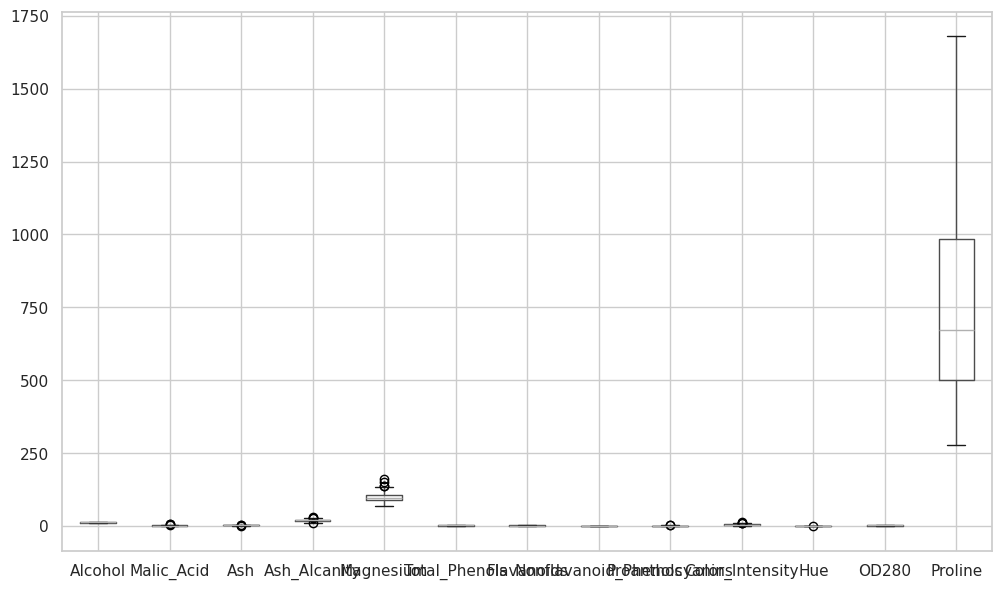

In [49]:
##Visualisation des outliers 

outliers = X.boxplot(figsize=(12,7))
outliers
plt.show()


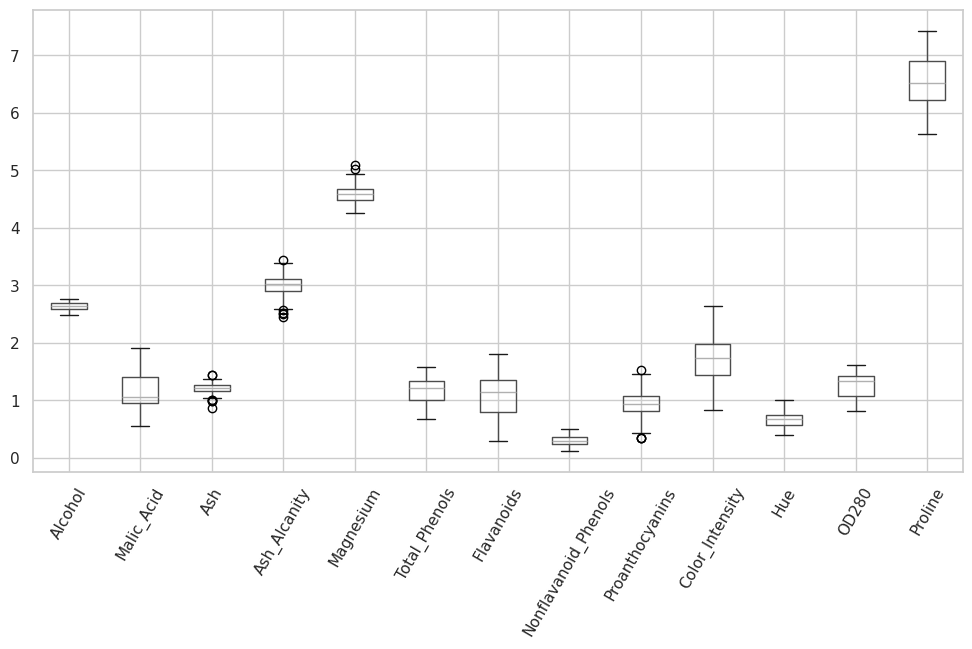

In [50]:
#Gestion des Outliers
X_ = np.log1p(X)
 
X_.boxplot(figsize=(12,6))
plt.xticks(rotation=60)
plt.show()

In [51]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [52]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler() 
                                   
X_scaled=scaler.fit_transform(X_)  

In [53]:
X_scaled.shape

(178, 13)

In [54]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

X_r = pca.fit_transform(X_scaled)

In [55]:
X_r.shape

(178, 2)

In [56]:
import pandas as pd

X_df_pca = pd.DataFrame(
    X_r,
    columns=["PC1", "PC2"]
)

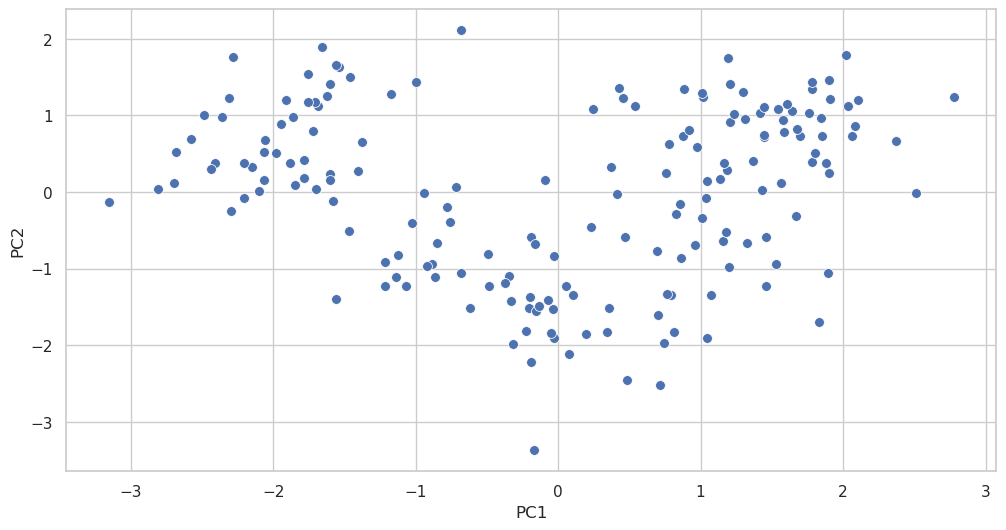

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X_df_pca,x='PC1',y="PC2",palette="Paired",s=50)

plt.show()

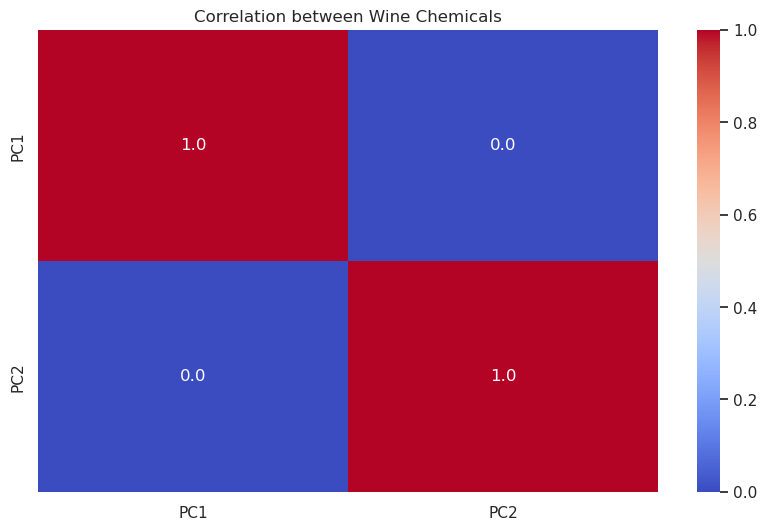

In [58]:

# 1. Heatmap to see how variable vary together
plt.figure(figsize=(10,6))
sns.heatmap(X_df_pca.corr(),annot=True,cmap='coolwarm', fmt=".1f")
plt.title("Correlation between Wine Chemicals")
plt.show()



In [59]:
X_

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,2.723267,0.996949,1.232560,2.809403,4.852030,1.335001,1.401183,0.246860,1.190888,1.893112,0.712950,1.593309,6.971669
1,2.653242,1.022451,1.144223,2.501436,4.615121,1.294727,1.324419,0.231112,0.824175,1.682688,0.717840,1.481605,6.957497
2,2.650421,1.211941,1.300192,2.975530,4.624973,1.335001,1.444563,0.262364,1.337629,1.899118,0.708036,1.427916,7.078342
3,2.732418,1.081805,1.252763,2.879198,4.736198,1.578979,1.501853,0.215111,1.156881,2.174752,0.620576,1.492904,7.300473
4,2.656055,1.278152,1.353255,3.091042,4.779123,1.335001,1.305626,0.329304,1.036737,1.671473,0.712950,1.368639,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.688528,1.894617,1.238374,3.068053,4.564348,0.985817,0.476234,0.418710,0.722706,2.163323,0.494696,1.007958,6.608001
174,2.667228,1.591274,1.247032,3.178054,4.634729,1.029619,0.559616,0.357674,0.879627,2.116256,0.530628,0.940007,6.621406
175,2.658159,1.663926,1.181727,3.044522,4.795791,0.951658,0.524729,0.357674,0.854415,2.415914,0.463734,0.940007,6.728629
176,2.651127,1.278152,1.214913,3.044522,4.795791,0.974560,0.518794,0.425268,0.900161,2.332144,0.470004,0.963174,6.734592


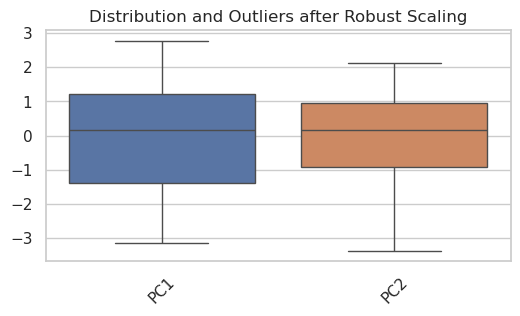

In [60]:

plt.figure(figsize=(6,3))
sns.boxplot(data=X_df_pca)
plt.xticks(rotation=45)
plt.title("Distribution and Outliers after Robust Scaling")
plt.show()

In [61]:
from sklearn.cluster import KMeans 

In [62]:
inertias_liste = []
for i in range(1,12):
    model = KMeans(n_clusters=i, init = 'k-means++',random_state=42)

    modele = model.fit(X_df_pca)

    inertias_liste.append(modele.inertia_)

inertias_liste

[597.102132687226,
 302.20752415921004,
 135.41160722845513,
 103.5017399507086,
 87.30584042356602,
 66.53214548425117,
 58.830665507858164,
 53.85661314017472,
 45.844096307235645,
 42.07740507587839,
 39.97855856427657]

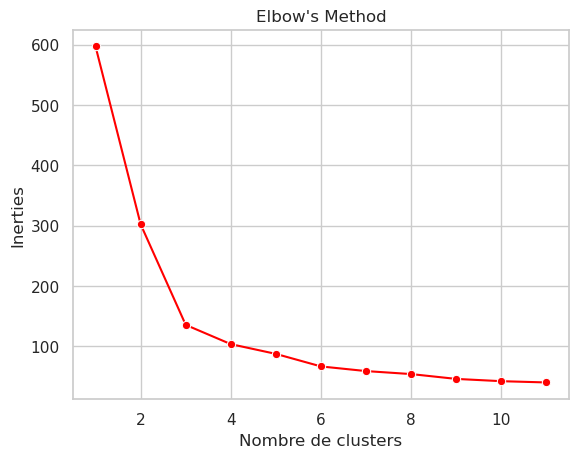

In [63]:

#plt.figure(figsize=(12,6)) 
sns.lineplot(x=range(1,12),y=inertias_liste,marker = 'o',color = 'red')
plt.title("Elbow's Method")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inerties")
plt.show()

In [64]:
from kneed import KneeLocator

best_k = KneeLocator(range(1,12),inertias_liste,curve="convex",direction="decreasing").elbow

best_k

np.int64(3)

In [65]:
model_kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42)

y_model = model_kmeans.fit(X_df_pca)

y_model 

KMeans(n_clusters=3, random_state=42)

In [66]:
centroides = pd.DataFrame(model_kmeans.cluster_centers_ )

centroides

,0,1
0,0.004696,-1.333546
1,-1.836377,0.644536
2,1.400283,0.644555


In [67]:
y_pred = y_model.predict(X_df_pca)

from sklearn.metrics import silhouette_score

score = silhouette_score(X_df_pca, y_pred)
print(score)

0.539006309295876


In [68]:
X_df_pca

,PC1,PC2
0,2.101628,1.197334
1,1.666296,-0.316047
2,1.542903,1.079336
3,2.019472,1.788360
4,0.541444,1.121168
...,...,...
173,-2.314053,1.222432
174,-1.758910,1.180181
175,-1.757321,1.542484
176,-1.603904,1.413567


In [69]:
X_df_pca["clusters"] = y_pred

X_df_pca.head()

,PC1,PC2,clusters
0,2.101628,1.197334,2
1,1.666296,-0.316047,2
2,1.542903,1.079336,2
3,2.019472,1.788360,2
4,0.541444,1.121168,2


In [71]:
X_.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [72]:
pca.components_.T

array([[ 0.10151563,  0.393735  ],
       [-0.26013826,  0.2208487 ],
       [-0.05237365,  0.47424646],
       [-0.30338848,  0.03245098],
       [ 0.1340707 ,  0.36004656],
       [ 0.33658057,  0.08507189],
       [ 0.39711592,  0.01499058],
       [-0.33382303,  0.00440828],
       [ 0.40410531,  0.10491965],
       [-0.09016942,  0.5006863 ],
       [ 0.31758056, -0.21419235],
       [ 0.33264814, -0.0908    ],
       [ 0.2095017 ,  0.34249529]])

In [73]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X_.columns
)
loadings 

,PC1,PC2
Alcohol,0.101516,0.393735
Malic_Acid,-0.260138,0.220849
Ash,-0.052374,0.474246
Ash_Alcanity,-0.303388,0.032451
Magnesium,0.134071,0.360047
Total_Phenols,0.336581,0.085072
Flavanoids,0.397116,0.014991
Nonflavanoid_Phenols,-0.333823,0.004408
Proanthocyanins,0.404105,0.104920
Color_Intensity,-0.090169,0.500686


In [85]:
def biplot(score, coeff, labels, cluster_labels):
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
   # plt.figure(figsize=(12,6))
    
    # Plot the arrows (the 13 variables)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        
        #plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        plt.text(coeff[i,0]*1.15, coeff[i,1] * 1.15, labels[i], color='darkred', ha='center', va='center', fontweight='bold')

    plt.scatter(xs * scalex, ys * scaley, c=cluster_labels, cmap='Paired', s=60, alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Wine Clustering Biplot: PCA + Original Variables")
    plt.grid()

feature_names = X_.columns

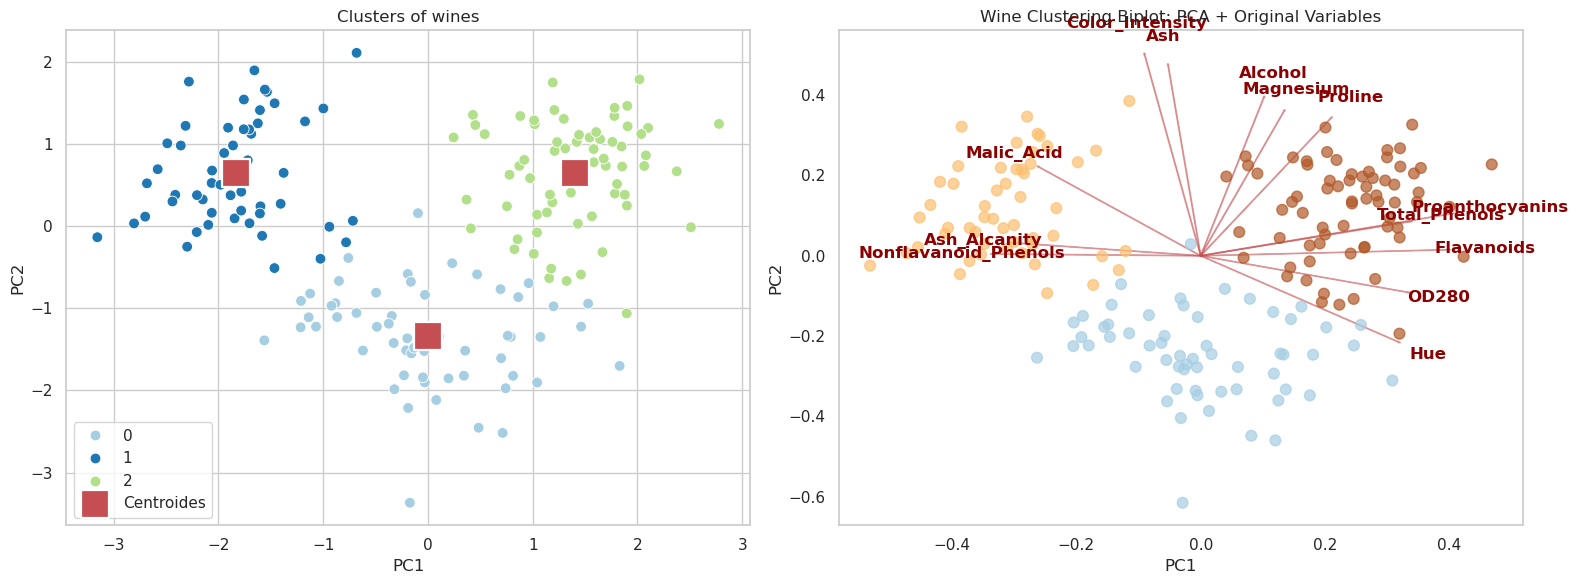

In [90]:
plt.figure(figsize=(16, 6)) 

# --- Plot 1: Clusters of Wines ---
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_df_pca, x='PC1', y='PC2', hue='clusters', palette="Paired", s=60)
sns.scatterplot(data=centroides, x=0, y=1, color='r', label='Centroides', s=400, marker=',')
plt.title('Clusters of wines')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

# --- Plot 2: Biplot (PCA Components) ---
plt.subplot(1, 2, 2)
biplot(X_r, np.transpose(pca.components_), labels=feature_names, cluster_labels=X_df_pca['clusters'])


plt.tight_layout() 
plt.show()

## Results' Interpretation

 Wine Clustering: Interpretation of Results

This dataset contains the chemical analysis of wines grown in the same region but derived from three different cultivars (grape varieties). Our clustering model successfully identified these three natural groups without being told the grape names.
The Clusters Explained

Cluster 1 (Dark Blue) - "High Intensity & High Alcohol"

    Chemical Profile: These wines have high levels of Alcohol, Proline, and Color Intensity.

    Interpretation: This group likely represents premium, full-bodied red wines (like a Barolo). They are complex and rich in tannins.

Cluster 2 (Light Green) - "The Balanced / Standard"

    Chemical Profile: These wines sit in the middle of the PCA plot. They have average levels of Magnesium and Alkanity of Ash.

    Interpretation: These are likely more common, balanced table wines. They don't have the extreme chemical markers of the other two groups but are very consistent.

Cluster 0 (Light Blue) - "Light & Aromatic"

    Chemical Profile: Low Color Intensity but high Hue and Total Phenols.

    Interpretation: These are likely lighter wines, possibly white wines or Rosés. They are more "aromatic" and less "heavy" than the others.

In [76]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

labels = agglo.fit_predict(X_df_pca)


In [77]:
from sklearn.metrics import silhouette_score

silhouette_score(X_df_pca, labels)


np.float64(0.6211623547001465)

To validate the choice of K=3, I performed Hierarchical Clustering and generated a Dendrogram. The vertical distance between the final merges suggests that the data naturally forms three primary clusters, which aligns with the three known cultivars of the wine dataset.

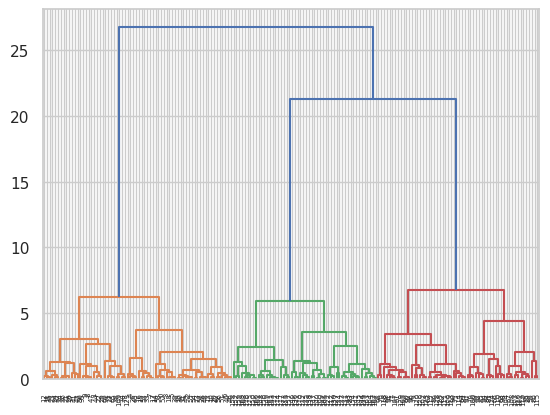

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_df_pca, method="ward")
dendrogram(Z)
plt.show()